# ACLR Data Group Exploratory Data Analysis
### Jessica Ni, Maya Uwaydat, Wissal Khlouf

## Audience/Stakeholder

...

## Problem Statement

...

## Important Variables

...

## Understanding and Cleaning Dataset

In [190]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [191]:
# Load in data
data = pd.read_csv('../data/aclr_data.csv')
data.head()

,record_id,redcap_event_name,redcap_repeat_instrument,sex_dashboard,graft_dashboard2,med_meniscus,lat_meniscus,lat_stab,physis,visit_sex,...,lsi_flex_mvic_60,acl_ext_isok_60,con_ext_isok_60,lsi_ext_isok_60,acl_flex_isok_60,con_flex_isok_60,lsi_flex_isok_60,strength_testing_complete,rts,rts_tss
0,1,baseline_arm_1,NaN,Male,Other,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,visit_1_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,...,NaN,2.57,2.92,87.86,1.50,1.45,103.32,2.0,NaN,NaN
2,1,long_term_outcomes_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,70.0
3,2,baseline_arm_1,NaN,Female,HS autograft,1.0,3.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,visit_1_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,...,NaN,0.97,2.16,45.00,0.88,1.20,72.98,2.0,NaN,NaN


In [192]:
# Lets see the shape
data.shape
# Wow, there are 11150 observations and 63 features

(11150, 63)

In [193]:
# That is a lot of observations, are there 11150 separate patients?
print(data['record_id'].nunique())
results1 = data['record_id'].value_counts().describe()

table = pd.DataFrame(results1) # this will show the results as a table format
display(table) 

# I see that there are 4739 unique patients and each patient may have multiple entries
# Subjects have an average of 2 visits

4739


,count
count,4739.000000
mean,2.352817
std,1.147803
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,17.000000


In [194]:
# Lets try to see what variable types we are working with
# This will show all variables that are categorical

data.select_dtypes(include=['object', 'category', 'string']).head(n=3)

,redcap_event_name,sex_dashboard,graft_dashboard2,visit_sex,visit_graft,age_group_dashboard_use,tss_dashboard,reinjury
0,baseline_arm_1,Male,Other,NaN,NaN,NaN,NaN,NaN
1,visit_1_arm_1,NaN,NaN,Male,Other,21 to 25 years,13 to 24 months,No
2,long_term_outcomes_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [195]:
# This will show the variables that are numerical/continuous

data.select_dtypes(include=['int64', 'float64']).head(n=3)

,record_id,redcap_repeat_instrument,med_meniscus,lat_meniscus,lat_stab,physis,age,age_group,age_group_dashboard,height_m,...,lsi_flex_mvic_60,acl_ext_isok_60,con_ext_isok_60,lsi_ext_isok_60,acl_flex_isok_60,con_flex_isok_60,lsi_flex_isok_60,strength_testing_complete,rts,rts_tss
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,21.7,5.0,5.0,1.9,...,NaN,2.57,2.92,87.86,1.5,1.45,103.32,2.0,NaN,NaN
2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,70.0


In [196]:
# First, let's keep only the columns we are interested in
data = data[['record_id', 'redcap_event_name', 'sex_dashboard', 'visit_sex', 'age', 'age_group', 'acl_rsi', 'lsi_ext_isok_60', 'lsi_flex_isok_60', 'acl_sh', 'rts', 'rts_tss']]

In [197]:
# Let's make sure all the columns are the correct data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11150 entries, 0 to 11149
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   record_id          11150 non-null  int64  
 1   redcap_event_name  11150 non-null  object 
 2   sex_dashboard      4737 non-null   object 
 3   visit_sex          5234 non-null   object 
 4   age                5126 non-null   float64
 5   age_group          5126 non-null   float64
 6   acl_rsi            3400 non-null   float64
 7   lsi_ext_isok_60    2227 non-null   float64
 8   lsi_flex_isok_60   2222 non-null   float64
 9   acl_sh             2444 non-null   float64
 10  rts                686 non-null    float64
 11  rts_tss            671 non-null    float64
dtypes: float64(8), int64(1), object(3)
memory usage: 1.0+ MB


In [198]:
# Let's spot missing values
data.isnull().sum()

record_id                0
redcap_event_name        0
sex_dashboard         6413
visit_sex             5916
age                   6024
age_group             6024
acl_rsi               7750
lsi_ext_isok_60       8923
lsi_flex_isok_60      8928
acl_sh                8706
rts                  10464
rts_tss              10479
dtype: int64

<Axes: >

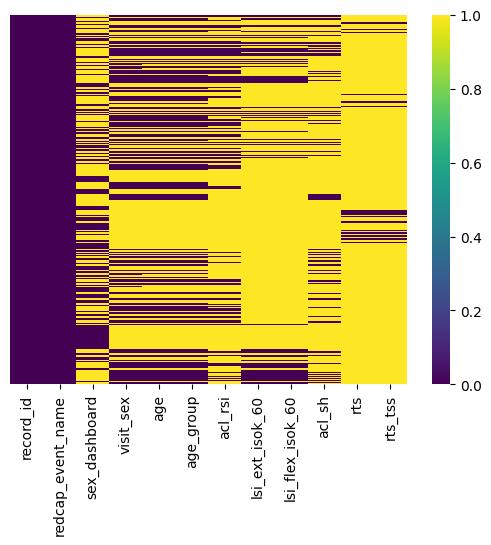

In [199]:
# Let's visually see where the missing values lie
sns.heatmap(data.isnull(), cmap='viridis', yticklabels=False)

# The yellow values show missing information.
# Record id and event description have no missing values
# It seems that many of the numerical measurements are missing, likely because there are multiple entries per subject.

In [200]:
# Let's start by filling data that is already known based on the subject's first entry

# Since we know that there are multiple entries per subject and each entry has at least an id associated with it, 
# I will start by filling in known cells, such as the sex based on the first occurrence 

# Here, for each patient, I filled in sex based on the sex listed in their first visit

data['sex_dashboard'] = data.groupby('record_id')['sex_dashboard'].transform('first')
data['sex_dashboard'] = data['sex_dashboard'].fillna('Unknown')

In [201]:
# Next, I noticed that within the event column, the first event called baseline_arm_1 has missing values for everything except the patient's sex,
# So, I will remove all of those observations since we already filled in sex in the code chunk above
data[data['redcap_event_name'] == 'baseline_arm_1'].head()

data = data[data['redcap_event_name'] != 'baseline_arm_1']

In [202]:
# Additionally, where there is an event called long_term_outcomes_arm_1, it just includes two pieces of information called rts (return to sport) 
# and rts_tss, so I will move those values to its own dataframe if needed later
data = data.drop(columns=['rts', 'rts_tss'])

rts_df = data[data['redcap_event_name'] == 'long_term_outcomes_arm_1']
data = data[data['redcap_event_name'] != 'long_term_outcomes_arm_1']

In [185]:
# Drop extra sex column
data = data.drop(columns=['visit_sex'])

In [204]:
# Let's make sure nothing is duplicated
data.duplicated().value_counts()

False    5239
Name: count, dtype: int64

<Axes: >

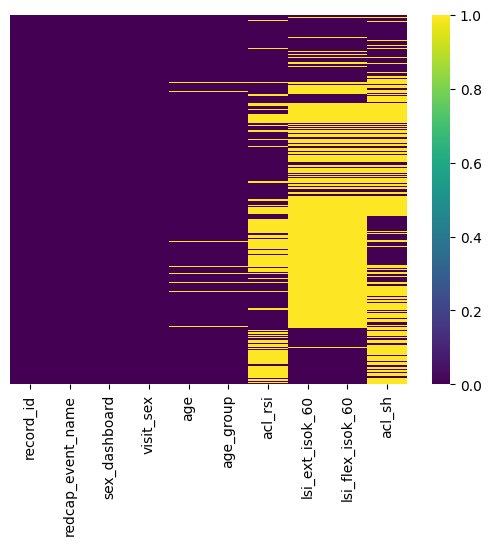

In [205]:
# Let's check how the missing values look now! 
sns.heatmap(data.isnull(), cmap='viridis', yticklabels=False)
# It looks much better, 

Since our dataset is longitudinal and patients come in at irregular time intervals, missing values for certain tests (like LSI or hop tests) at specific visits is very common. The missing data isn't random, it's structural because not all tests are performed at each visit. 

For this reason, we have decided to leave missing values without imputing them, as imputing may distort the true patterns of recovery. Usually, test values should get better as a patient is recovering, but if we imputed with mean values, that may distort the pattern of recovery. Not imputing helps us avoid making assumptions about missing data.

Additionally, missing data may signify patient recovery. If a patient skips a test, that may mean they are recovering at a pace in which the test is not needed.

In [207]:
data[data['lsi_ext_isok_60'].isna()].head()

,record_id,redcap_event_name,sex_dashboard,visit_sex,age,age_group,acl_rsi,lsi_ext_isok_60,lsi_flex_isok_60,acl_sh
5,2,visit_2_arm_1,Female,Female,14.6,2.0,95.0,NaN,NaN,1.09
6,2,visit_3_arm_1,Female,Female,15.6,3.0,92.5,NaN,NaN,NaN
58,17,visit_3_arm_1,Male,Male,17.7,3.0,82.5,NaN,NaN,1.91
67,20,visit_2_arm_1,Female,Female,21.4,5.0,85.8,NaN,NaN,NaN
71,21,visit_2_arm_1,Female,Female,19.1,4.0,96.7,NaN,NaN,NaN


To look into this idea some more, in the above table, we can see that there are missing values for limb symmetry index. But upon closer looks, it seems that the patient does not perform every test each doctor's visit. We can see that even though one test is missing, other tests like the acl_rsi (readiness to return to sport) or acl_sh (single hop test) are filled.